# Setup the database

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import glob
import numpy as np
import os
import pandas as pd

print(tf.__version__)

2.0.0-alpha0


In [2]:
IMAGE_FOLDER = "/home/till/mongo"
IMAGE_SHAPE = (64, 64)

In [3]:
from nltk.corpus import stopwords
stop = stopwords.words('french')

In [4]:
store_references = pd.read_csv("store_references.csv")

In [5]:
import ast
def get_first_node(x):
    try:
        return ast.literal_eval(x)[0]
    except:
        return None

In [6]:
store_references['first_node'] = pd.Categorical(store_references['classification.v0_3.node_ids'].apply(get_first_node))
store_references['fn'] = store_references['first_node'].cat.codes

In [7]:
class_names = store_references['first_node'].cat.categories

In [8]:
store_references

,_id,brand_name,label,packaging,classification.v0_3.node_ids,classification.v0_3.classified_by,first_node,fn
0,ObjectId(51d2c538c0569c851c000002),Mentos,Chewing-gum Full Ice menthe réglisse sans sucres,la boite de 50 - 100 g,"[""node-epicerie-sucree"",""node-confiseries"",""no...",admin,node-epicerie-sucree,7
1,ObjectId(51d2c538c0569c851c000003),Mentos,Bonbons tendres dragéifiés Fruit,les 4 rouleaux de 38 g,"[""node-epicerie-sucree"",""node-confiseries"",""no...",admin,node-epicerie-sucree,7
2,ObjectId(51d2c538c0569c851c000005),Glen Grant,Scotch whisky single malt,la bouteille de 70 cl,"[""node-boissons"",""node-spiritueux"",""node-eaux-...",admin,node-boissons,3
3,ObjectId(51d2c538c0569c851c000006),Alsa,Gâteau de semoule nappé de caramel,la boite de 414 g,"[""node-epicerie-sucree"",""node-aides-patisserie...",ClassificationEngine,node-epicerie-sucree,7
4,ObjectId(51d2c538c0569c851c000009),Dillon,Rhum blanc agricole Martinique,la bouteille de 100 cl,"[""node-boissons"",""node-spiritueux"",""node-eaux-...",admin,node-boissons,3
5,ObjectId(51d2c538c0569c851c00000b),Carte d'Or,Crème glacée au café arabica de Colombie,le bac de 500 g,"[""node-surgele"",""node-surgele-plats-transforme...",admin,node-surgele,14
6,ObjectId(51d2c538c0569c851c00000c),Signal,"Dentifrice Très Près gel menthe plus extrême, ...",le tube de 75 ml,"[""node-hygiene-beaute"",""node-hygiene-dentaire""...",admin,node-hygiene-beaute,9
7,ObjectId(51d2c538c0569c851c00000e),Gillette,Rasoir jetable Blue II Fixe Gillette,lot de 10 rasoirs x10,"[""node-hygiene-beaute"",""node-hygiene-corps"",""n...",admin,node-hygiene-beaute,9
8,ObjectId(51d2c538c0569c851c000010),Lu,Le Véritable Petit Beurre 'Dans la Poche',le paquet de 300 g,"[""node-epicerie-sucree"",""node-gouters"",""node-b...",legacy,node-epicerie-sucree,7
9,ObjectId(51d2c538c0569c851c000013),Lu,Biscuit chocolat & 5 céréales complètes biscuits,les 8 sachets de 4 - 400 g,"[""node-epicerie-sucree"",""node-gouters"",""node-b...",admin,node-epicerie-sucree,7


In [9]:
store_references_filtered = store_references.dropna().set_index("_id")

In [10]:
# Filter the references based on the file we have
images_files = glob.glob("{}/*.jpg".format(IMAGE_FOLDER))

def get_file_path(oid):
    return "{}/{}.jpg".format(IMAGE_FOLDER, oid)

def file_exists(oid):
    filename = get_file_path(oid)
    return os.path.isfile(filename)

def get_image_array(oid):
    filename = get_file_path(oid)
    if file_exists(oid):
        try:
            return np.array(cv2.resize(cv2.imread(filename), IMAGE_SHAPE) / 255)
        except Exception as e:
            return pd.np.array()

In [11]:
store_references_filtered.shape

(427908, 7)

In [12]:
# We remove references which have no picture
store_references_filtered['has_file'] = store_references_filtered.index.map(file_exists)
store_references_filtered = store_references_filtered[store_references_filtered['has_file']]
store_references_filtered['filepath'] = store_references_filtered.index.map(get_file_path)

In [13]:
store_references_filtered.shape

(261739, 9)

In [45]:
X = store_references_filtered[['label', 'first_node', 'filepath']]
y = store_references_filtered[['fn']]

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=0.33, random_state=42)

### Deep learning classification using textual informations

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(
    strip_accents="unicode",
    stop_words=stop,
    ngram_range=(1,1),
    analyzer="word")
vectorizer.fit(X_train['label'])

train_data = vectorizer.transform(X_train['label'])
test_data = vectorizer.transform(X_test['label'])

In [48]:
vocab_size = len(vectorizer.vocabulary_)

nlp_model = keras.Sequential()
nlp_model.add(keras.layers.Embedding(vocab_size, 10, input_length=vocab_size))
nlp_model.add(keras.layers.Flatten())
nlp_model.add(keras.layers.Dense(128, activation=tf.nn.relu))
nlp_model.add(keras.layers.Dense(len(store_references['fn'].unique()), activation=tf.nn.softmax))
nlp_model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 19628, 10)         196280    
_________________________________________________________________
flatten_3 (Flatten)          (None, 196280)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               25123968  
_________________________________________________________________
dense_6 (Dense)              (None, 16)                2064      
Total params: 25,322,312
Trainable params: 25,322,312
Non-trainable params: 0
_________________________________________________________________


In [49]:
nlp_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])

In [50]:
train_size = int(train_data.shape[0] * 2 / 3)

In [51]:
x_val = train_data[train_size:]
partial_x_train = train_data[:train_size]

y_val = train_labels[train_size:].values
partial_y_train = train_labels[:train_size].values

In [52]:
partial_x_train

<116910x19628 sparse matrix of type '<class 'numpy.int64'>'
	with 498276 stored elements in Compressed Sparse Row format>

In [53]:
y_val

array([[13],
       [ 3],
       [ 2],
       ...,
       [ 0],
       [13],
       [ 0]], dtype=int8)

In [25]:
history = nlp_model.fit(partial_x_train,
                        partial_y_train,
                        epochs=5,
                        batch_size=512,
                        validation_data=(x_val, y_val),
                        verbose=1)

Train on 175365 samples, validate on 0 samples
Epoch 1/5
  4608/175365 [..............................] - ETA: 11:19 - loss: 2.5347 - acc: 0.2077

KeyboardInterrupt: 

In [20]:
results = nlp_model.evaluate(test_data, test_labels)

print(results)

141210/141210 [==============================] - 336s 2ms/sample - loss: 0.2679 - acc: 0.9358
[0.26790168728344643, 0.93582606]


### Simple classification using SVM

In [54]:
from sklearn import svm
lin_clf = svm.LinearSVC()
lin_clf.fit(train_data, train_labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [55]:
test_pred = lin_clf.predict(test_data)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, test_pred)

0.9315418991826244

### Deep learning classification using images

#### Plot the images

In [32]:
import cv2
import matplotlib.pyplot as plt

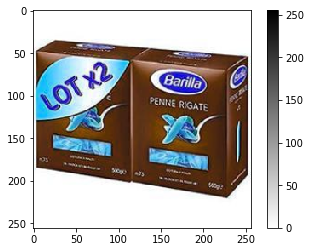

In [33]:
img = cv2.imread(images_files[1])
plt.figure()
plt.imshow(cv2.resize(img, (256, 256)), cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [34]:
def generate_arrays_from_file(df):
    while True:
        for i, row in df.iterrows():
            image = get_image_array(i)
            print(image.shape)
            
            if len(image):
                yield (image, row['fn'])
            else:
                continue

In [35]:
# This part was used when all the picture could fit in memory

# images = pd.np.array([get_image_array(i) for i, row in store_references_filtered.iterrows()])
# store_references_filtered['image'] = store_references_filtered.index.map(get_image_array)

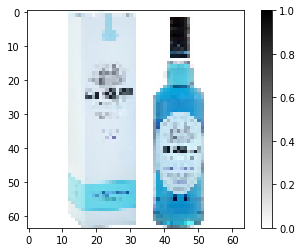

In [36]:
img = get_image_array(store_references_filtered.index[2])
plt.figure()
plt.imshow(img, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

#### Init the model

In [37]:
import keras.utils.vis_utils as vutils
from keras_preprocessing.image import ImageDataGenerator
from IPython.display import SVG

Using TensorFlow backend.


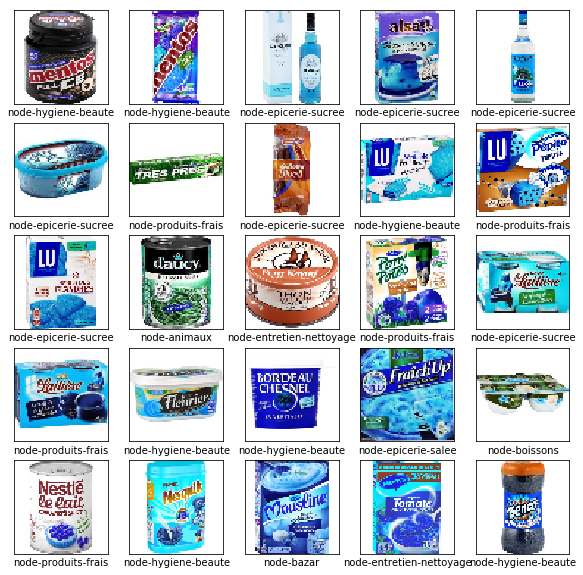

In [38]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(get_image_array(store_references_filtered.index[i]), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels['fn'][i]])
plt.show()

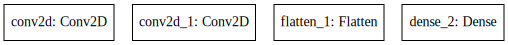

In [39]:
simple_model = keras.Sequential([
    keras.layers.Conv2D(6, (5, 5), activation='relu'), #, input_shape=X_train['image'].iloc[0].shape),
    keras.layers.Conv2D(16, (5, 5), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(len(class_names), activation=tf.nn.softmax)
])
SVG(vutils.model_to_dot(simple_model).create(prog='dot', format='svg'))

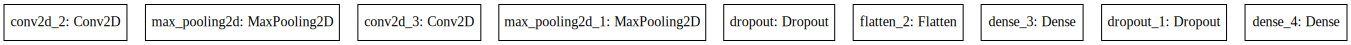

In [40]:
complex_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu'), #, input_shape=X_train['image'].iloc[0].shape),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.25),    
    keras.layers.Dense(len(class_names), activation=tf.nn.softmax)
])
SVG(vutils.model_to_dot(complex_model).create(prog='dot', format='svg'))

In [62]:
simple_model.compile(optimizer='adam', 
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])
complex_model.compile(optimizer='adam', 
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

In [63]:
# train_images = np.stack(X_train['image'].values)
# test_images = np.stack(X_test['image'].values)
datagen = ImageDataGenerator(rescale=1./255)
train_generator=datagen.flow_from_dataframe(
    dataframe=store_references_filtered,
    directory=IMAGE_FOLDER,
    x_col="filepath",
    y_col="first_node",
    class_mode="categorical",
    target_size=IMAGE_SHAPE,
    batch_size=32
)
def my_gen(gen):
    while True:
        try:
            data, labels = next(gen)
            yield data, labels
        except:
            pass

Found 261739 images belonging to 15 classes.


In [64]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size

simple_model.fit_generator(
    my_gen(train_generator),
    steps_per_epoch=STEP_SIZE_TRAIN,
    epochs=5,
    use_multiprocessing=True
)

Epoch 1/5
 116/8179 [..............................] - ETA: 4:37:44 - loss: 2.0675 - accuracy: 0.3327

KeyboardInterrupt: 

In [ ]:
simple_model.fit(train_images, train_labels, epochs=5)

In [ ]:
test_loss, test_acc = simple_model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

```
simple    5 epoch: 0.6521547
complex   5 epoch: 0.7081523
complex  20 epoch: 0.7815187
complex 100 epoch: 0.8111888
```